## This notebook prepares a plot of daily temperature averages in relation to time. 

In [18]:
#Just have to run this one time as I did not have the package installed. It is needed to be able to save the html figure. 
#pip install -U kaleido

## Import packages

In [87]:
import s3fs # S3 file system package
import xarray as xr # loadng in data sets and plotting
import numpy as np # useful for dealing with data arrays and calculations
import matplotlib.pyplot as plt # plotting of data
import matplotlib.dates as mdates # for converting year dates to months on x-axis
import pandas as pd # used for creating data frames and saving as CSV files
import seaborn as sns

# import AWS packages
import boto3 # general AWS package
from botocore import UNSIGNED # for downloading objects anonamously (without the need for credentials)
from botocore.config import Config # for downloading objects anonamously (without the need for credentials)
import os

# import to save html
import plotly.tools as tls
import plotly.io as pio
import base64
from io import BytesIO


import plotly.tools as tls
import plotly.io as pio
import cmocean
import os
import plotly.graph_objects as go
import datetime

____
# Accessing the Data Products

## Amazon Web Services Simple Storage Service (AWS S3)

Data can be accessed using AWS S3 or OPeNDAP links. I am using AWS S3 here as in practice it is often quicker than OPeNDAP. 

In [12]:
# load in methods for reading, writing, and managing files stored in S3. The connection is made anonamously. 
s3 = s3fs.S3FileSystem(anon=True) 

### AMDOT-EXT data products

In [13]:
# List all data folders available from UNSW
data_files = s3.ls("imos-data/UNSW/")
data_files

['imos-data/UNSW/NRS_climatology',
 'imos-data/UNSW/NRS_extremes',
 'imos-data/UNSW/NSW_Glider_climatology']

In [14]:
# List all data folders available from UNSW
data_files = s3.ls("imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2")
data_files

['imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/MAI090',
 'imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/PH050',
 'imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/PH100',
 'imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/ROT055']

In [15]:
# List all data folders available from UNSW
data_files = s3.ls("imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/MAI090")
data_files

['imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/MAI090/MAI090_TEMP_EXTREMES_1944-2023_v2.nc',
 'imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/MAI090/MAI090_TEMP_MHWMCS_SUMMARY_1944-2023.csv']

In [16]:
# List all data folders available from UNSW
data_files = s3.ls("imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/MAI090")
data_files

['imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/MAI090/MAI090_TEMP_EXTREMES_1944-2023_v2.nc',
 'imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/MAI090/MAI090_TEMP_MHWMCS_SUMMARY_1944-2023.csv']

____

## Loading the files from S3 bucket

In [17]:
# use xarray to load in the datasets
# Note: this takes longer than expected, so I ran the code in the cells above instead to save the data to home
bucket_prefix = "imos-data/UNSW/NRS_extremes/Temperature_DataProducts_v2/"

MAI090 = xr.open_dataset(s3.open(bucket_prefix + "MAI090/MAI090_TEMP_EXTREMES_1944-2023_v2.nc"))
#PH100 = xr.open_dataset(s3.open(bucket_prefix + "PH100/PH100_TEMP_EXTREMES_1953-2023_v2.nc"))

# if you instead want to load the data sets into memory, use the method .load() as in the cell above

<img src='https://ohw2024.s3.ap-southeast-2.amazonaws.com/important.png' width='30' height='30'> 

**Note:** xarray uses lazy loading as default. This means that the data set information such as attributes, dimensions, and data type is loaded, but the variable values are not. This is useful for large data sets (such as model output) when you want to get a feel for the data without waiting for the data to load. When you want to plot the data or calculate something you may find that it takes longer the first time. This is because at this stage the data is being loaded into memory.


In [18]:
MAI090

<xarray.Dataset>
Dimensions:                                 (TIME: 29176, DEPTH: 2)
Coordinates:
  * TIME                                    (TIME) datetime64[ns] 1944-01-02T...
  * DEPTH                                   (DEPTH) float32 2.0 21.0
Data variables: (12/35)
    TEMP                                    (TIME, DEPTH) float32 ...
    TEMP_INTERP                             (TIME, DEPTH) float32 ...
    TEMP_HEAT_SPIKE                         (TIME, DEPTH) float32 ...
    TEMP_COLD_SPIKE                         (TIME, DEPTH) float32 ...
    TEMP_EXTREME_INDEX                      (TIME, DEPTH) float32 ...
    TEMP_PER10                              (TIME, DEPTH) float32 ...
    ...                                      ...
    MCS_EVENT_INTENSITY_VAR                 (TIME, DEPTH) float32 ...
    MCS_EVENT_INTENSITY_CUMULATIVE          (TIME, DEPTH) float32 ...
    MCS_EVENT_INTENSITY_MEAN_RELPERC        (TIME, DEPTH) float32 ...
    MCS_EVENT_INTENSITY_MAX_RELPERC         (TIME, DEPTH) float32 ...
    MCS_EVENT_INTENSITY_VAR_RELPERC         (TIME, DEPTH) float32 ...
    MCS_EVENT_INTENSITY_CUMULATIVE_RELPERC  (TIME, DEPTH) float32 ...
Attributes: (12/36)
    date_created:                  2024-08-06T15:17:55Z
    title:                         Maria Island 90 m Australian Multi-Decadal...
    abstract:                      Extreme temperature events identified at t...
    Conventions:                   CF-1.6, IMOS-1.4
    acknowledgement:               Any users of IMOS data are required to cle...
    citation:                      The data set citation in a list of referen...
    ...                            ...
    license:                       http://creativecommons.org/licenses/by/4.0/
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    naming_authority:              IMOS
    time_coverage_start:           1944-01-02T12:00:00Z
    time_coverage_end:             2023-11-18T12:00:00Z
    comment:                       At times when no MHW/MCS events are detect...

In [19]:
#PH100

In [20]:
MAI090['TEMP_EXTREME_INDEX']

<xarray.DataArray 'TEMP_EXTREME_INDEX' (TIME: 29176, DEPTH: 2)>
array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 1944-01-02T12:00:00 ... 2023-11-18T12:00:00
  * DEPTH    (DEPTH) float32 2.0 21.0
Attributes:
    units:          1
    long_name:      extreme temperature event index
    standard_name:  status_flag
    valid_max:      12.0
    valid_min:      0.0
    flag_values:    [ 0.  1.  2. 11. 12.]
    flag_meanings:  no_event cold_spike marine_cold_spell heat_spike marine_h...

## Plotting the data / first look

In [21]:
depths = MAI090['DEPTH'].values
print(depths)

[ 2. 21.]


In [22]:
MAI090.TEMP[:,1]

<xarray.DataArray 'TEMP' (TIME: 29176)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 1944-01-02T12:00:00 ... 2023-11-18T12:00:00
    DEPTH    float32 21.0
Attributes:
    units:          degrees_celsius
    long_name:      sea water temperature
    standard_name:  sea_water_temperature
    valid_max:      20.69
    valid_min:      10.3

## Plotting and saving static png just for reference

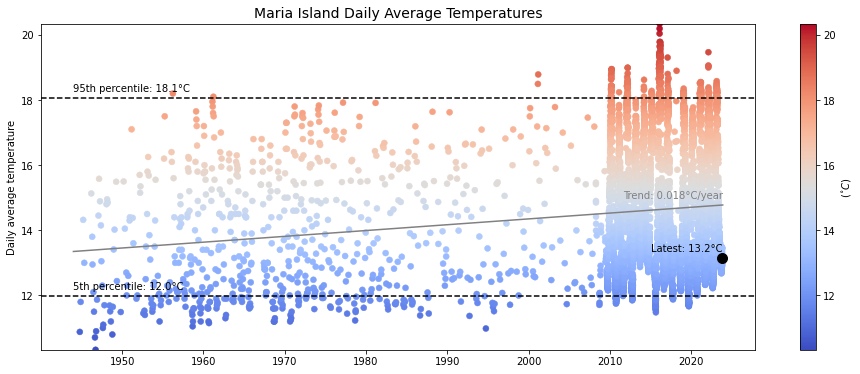

In [137]:
# Calculate percentiles
p5 = MAI090.TEMP[:, 1].quantile(0.05).item()
p95 = MAI090.TEMP[:, 1].quantile(0.95).item()

# Plot
fig, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(x=MAI090.TIME, y=MAI090.TEMP[:, 1], hue=MAI090.TEMP[:, 1], palette='coolwarm', edgecolor=None, legend=False)

# Add percentile lines
plt.axhline(y=p5, color='black', linestyle='--')
plt.axhline(y=p95, color='black', linestyle='--')

# Add text labels for percentiles
plt.text(MAI090.TIME.values[1], p5 + 0.3, f'5th percentile: {p5:.1f}°C', color='black', va='center', ha='left', fontsize=10)
plt.text(MAI090.TIME.values[1], p95 + 0.3, f'95th percentile: {p95:.1f}°C', color='black', va='center', ha='left', fontsize=10)

# Convert datetime64 to numerical format
time_numeric = MAI090.TIME.values.astype('datetime64[D]').astype(float)
valid_indices = ~np.isnan(MAI090.TEMP[:, 1])
time_numeric_valid = time_numeric[valid_indices]
temperature_valid = MAI090.TEMP[:, 1][valid_indices]

# Perform linear regression
z = np.polyfit(time_numeric_valid, temperature_valid, 1)
p = np.poly1d(z)
days_per_year = 365.25
trend_per_year = z[0] * days_per_year

# Plot trend line
plt.plot(time_numeric, p(time_numeric), color='gray', linestyle='-', label=f'Trend: {trend_per_year:.3f}°C/year')
plt.text(MAI090.TIME.values[-1], p(time_numeric[-1]) + 0.3, f'Trend: {trend_per_year:.3f}°C/year', color='gray', va='center', ha='right', fontsize=10)

# Mark the latest value
latest_valid_index = np.where(~np.isnan(MAI090.TEMP[:, 1]))[0][-1]
latest_valid_time = MAI090.TIME[latest_valid_index]
latest_valid_temp_value = MAI090.TEMP[latest_valid_index, 1].item()
plt.scatter(latest_valid_time, latest_valid_temp_value, color='black', edgecolor='black', s=100)
plt.text(latest_valid_time, latest_valid_temp_value + 0.3, f'Latest: {latest_valid_temp_value:.1f}°C', color='black', va='center', ha='right', fontsize=10)

# Add colorbar
norm = plt.Normalize(vmin=MAI090.TEMP[:, 1].min(), vmax=MAI090.TEMP[:, 1].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='($^{\circ}C$)')

# Customize plot
plt.title('Maria Island Daily Average Temperatures', fontsize=14)
plt.xlabel('')
plt.ylabel('Daily average temperature')
plt.ylim(MAI090.TEMP[:, 1].min(), MAI090.TEMP[:, 1].max())


##save fig as png
save_results_to = '/g/data/v45/ns3783/ohw24_proj_MessageMeWhenItsHot_the_MHW_Vis-Report_app_au/Figures/'
plt.savefig(save_results_to + 'DailyAVG_plot.png', dpi=120,bbox_inches='tight', pad_inches=0.1)

## Plotting and saving in json for Web App integration

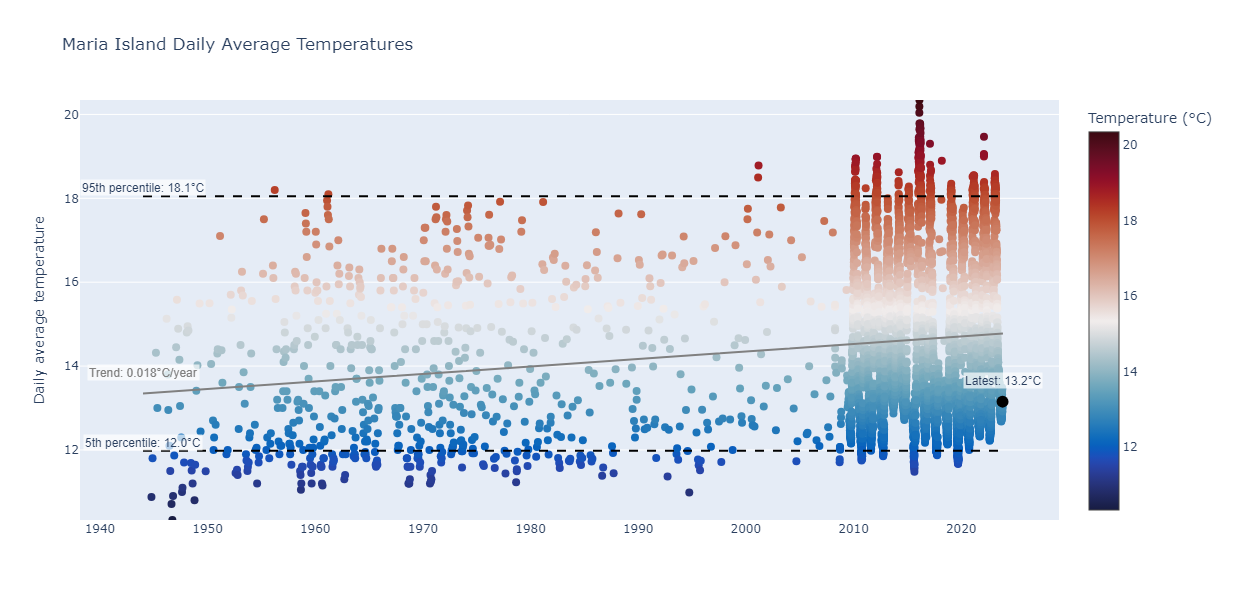

In [136]:
# Convert the cmocean colormap to a Plotly-compatible colorscale
cmocean_colors = cmocean.cm.balance(np.linspace(0, 1, 256))
plotly_colorscale = [[i / (len(cmocean_colors) - 1), f'rgb({int(r * 255)}, {int(g * 255)}, {int(b * 255)})'] for i, (r, g, b, a) in enumerate(cmocean_colors)]

# Calculate percentiles
p5 = MAI090.TEMP[:, 1].quantile(0.05).item()
p95 = MAI090.TEMP[:, 1].quantile(0.95).item()

# Convert datetime64 to numerical format
time_numeric = MAI090.TIME.values.astype('datetime64[D]').astype(float)
valid_indices = ~np.isnan(MAI090.TEMP[:, 1])
time_numeric_valid = time_numeric[valid_indices]
temperature_valid = MAI090.TEMP[:, 1][valid_indices]

# Perform linear regression
z = np.polyfit(time_numeric_valid, temperature_valid, 1)
p = np.poly1d(z)
days_per_year = 365.25
trend_per_year = z[0] * days_per_year

# Create the Plotly figure
fig = go.Figure()

# Scatter plot with color gradient
fig.add_trace(go.Scatter(
    x=MAI090.TIME, 
    y=MAI090.TEMP[:, 1],
    mode='markers',
    marker=dict(
        color=MAI090.TEMP[:, 1],
        colorscale=plotly_colorscale ,
        showscale=True,
        colorbar=dict(title='Temperature (°C)'),
        size=8,
    ),
    showlegend=False
))

# Convert time before calling lines in
# Extract underlying NumPy arrays from xarray DataArray
time_values = MAI090.TIME.values
# Convert xarray DataArray values to pandas datetime
dates = pd.to_datetime(time_values)
# Get min and max dates
time_min = dates.min()
time_max = dates.max()

# Add percentile lines
fig.add_trace(go.Scatter(
    x=[time_min, time_max],
    y=[p5, p5],
    mode='lines+text',
    line=dict(color='black', dash='dash'),
    #text=[f'5th percentile: {p5:.1f}°C'], # I have modified this to show it in boxes instead
    #textposition='top right',
    name=f'5th percentile: {p5:.1f}°C', # it won't appear unless we choose to show the interactive legend
    showlegend=False
))

fig.add_trace(go.Scatter(
    x=[time_min, time_max],
    y=[p95, p95],
    mode='lines+text',
    line=dict(color='black', dash='dash'),
    #text=[f'95th percentile: {p95:.1f}°C'],
    #textposition='top right',
    name=f'95th percentile: {p95:.1f}°C',
    showlegend=False
))

# Add trend line
fig.add_trace(go.Scatter(
    x=MAI090.TIME,
    y=p(time_numeric),
    mode='lines+text',
    line=dict(color='gray'),
    #text=[f'Trend: {trend_per_year:.3f}°C/year'],
    #textposition='bottom right',
    name=f'Trend: {trend_per_year:.3f}°C/year',
    showlegend=False
))

# Mark the latest value
latest_valid_index = np.where(~np.isnan(MAI090.TEMP[:, 1]))[0][-1]
latest_valid_temp_value = MAI090.TEMP[latest_valid_index, 1].item()
latest_valid_time = MAI090.TIME[latest_valid_index]
latest_valid_time = pd.to_datetime(np.array(latest_valid_time, dtype=np.int64), unit='ns')

fig.add_trace(go.Scatter(
    x=[latest_valid_time],
    y=[latest_valid_temp_value],
    mode='markers+text',
    marker=dict(color='black', size=12),
    #text=[f'Latest: {latest_valid_temp_value:.1f}°C'],
    #textposition='top left',
    showlegend=False
))

# Customize layout with annotations and transparent background
fig.update_layout(
    title='Maria Island Daily Average Temperatures',
    xaxis_title='',
    yaxis_title='Daily average temperature',
    xaxis=dict(showgrid=False),
    yaxis=dict(range=[MAI090.TEMP[:, 1].min(), MAI090.TEMP[:, 1].max()]),
    height=600,
    width=1000,
    annotations=[
        dict(
            x=time_min,
            y=p5 + 0.2,
            text=f'5th percentile: {p5:.1f}°C',
            showarrow=False,
            font=dict(size=12, family='Arial'),
            align='center',
            bgcolor='rgba(255, 255, 255, 0.7)'  # White background with 70% opacity
        ),
        dict(
            x=time_min,
            y=p95 + 0.2,
            text=f'95th percentile: {p95:.1f}°C',
            showarrow=False,
            font=dict(size=12, family='Arial'),
            align='center',
            bgcolor='rgba(255, 255, 255, 0.7)'  # White background with 70% opacity
        ),
        dict(
            x=time_min,
            y=p(time_numeric[0]) + 0.5,
            text=f'Trend: {trend_per_year:.3f}°C/year',
            showarrow=False,
            font=dict(size=12, family='Arial',color='gray'),
            align='center',
            bgcolor='rgba(255, 255, 255, 0.7)'  # White background with 70% opacity
        ),
        dict(
            x=latest_valid_time,
            y=latest_valid_temp_value + 0.5,
            text=f'Latest: {latest_valid_temp_value:.1f}°C',
            showarrow=False,
            font=dict(size=12, family='Arial'),
            align='center',
            bgcolor='rgba(255, 255, 255, 0.7)'  # White background with 70% opacity
        )
    ]
)

# Show figure
fig.show()

# Define the directory where you want to save the HTML file
save_directory = '/g/data/v45/ns3783/ohw24_proj_MessageMeWhenItsHot_the_MHW_Vis-Report_app_au/Figures/'
# Ensure the directory exists
os.makedirs(save_directory, exist_ok=True)
# Define the file path
file_path = os.path.join(save_directory, 'DailyAVG_plot.json')
# Save the Plotly figure as an HTML file
pio.write_json(fig, file=file_path)
